In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

stats:

G = games played\
GS = games started\
MP = minutes played\
PER = player efficiency rating\
TS%	= true shooting percentage (point/(2 x TSA) (a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.)\
3PAr = 3-Point Attempt Rate (3PA / FGA)\
FTr	= Free Throw Rate or FTR is the ratio of Free Throw Attempts to Field Goal Attempts.\
ORB% = Offensive Rebound Percentage\
DRB% = Defensive Rebound Percentage\
TRB% = Total Rebound Percentage\
AST% = Assist Percentage\
STL% = steal percentage\
BLK% = block percentage\
TOV% = Turnover Percentage\
USG% = Usage Percentage\
blanl	\
OWS = Offensive Win Shares\
DWS	= Defensive Win Shares\
WS = Win Shares; an estimate of the number of wins contributed by a player\
WS/48 = Win Shares Per 48 Minutes\
blank2	\
OBPM = offensive Box Plus/Minus\
DBPM = defensive Box Plus/Minus\
BPM	= Box Plus/Minus, metric for evaluating basketball players' quality and contribution to the team\
VORP = Value Over Replacement Player\
FG = Field Goals\
FGA	= Field Goal attempts\
FG%	= Field Goals percentage\
3P = 3 pointers\
3PA	= 3 point attempts\
3P%	= 3 point percentage\
2P = 2-Point Field Goals\
2PA	= 2-Point Field Goals attempts\
2P%	= 2-Point Field Goals percentage\
eFG% = Effective Field Goal Percentage\
FT = Free Throws\
FTA	= Free Throws attempts\
FT%	= Free Throws percentage\
ORB	= Offensive Rebound\
DRB	= defensive rebound\
TRB	= total rebound\
AST	= assists\
STL	= steals\
BLK	= blocks\
TOV	= turnovers\
PF = personal fouls\
PTS = points\

In [2]:
df = pd.read_csv('data/nbaplayers1718_2.csv')

In [3]:
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace(' ', '')
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace('$', '')
df[' Player Salary in $ '] = df[' Player Salary in $ '].str.replace(',', '')
df[' Player Salary in $ '] = pd.to_numeric(df[' Player Salary in $ '])

In [4]:
df.drop(columns=['blanl', 'blank2'], inplace=True)

In [5]:
df.describe()

,#,Season Start,Player Salary in $,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,486.000000,486.0,4.230000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,485.000000,485.000000,485.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,485.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,485.000000,486.000000,486.000000,450.000000,486.000000,486.000000,484.000000,485.000000,486.000000,486.000000,471.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,24392.170782,2017.0,7.380453e+06,26.405350,53.783951,25.308642,1223.051440,13.020782,0.526944,0.314058,0.270179,5.067901,15.211934,10.145267,13.067695,1.545062,1.664403,12.809072,18.608848,1.335597,1.243416,2.580247,0.077249,-1.397531,-0.304733,-1.701852,0.616667,197.656379,432.337449,0.441268,48.864198,136.676955,0.299342,148.792181,295.660494,0.483099,0.493794,90.294239,116.985597,0.741155,51.329218,168.962963,220.292181,114.522634,38.997942,24.041152,67.691358,100.720165,534.471193
std,171.748286,0.0,7.629048e+06,4.345194,24.835638,28.715875,842.438143,5.762420,0.089771,0.209748,0.180287,4.246585,7.337450,5.201848,9.172849,0.923243,1.690613,5.332382,5.597041,2.081620,1.085874,2.898265,0.082869,3.396019,2.033137,4.220521,1.454814,174.667670,371.858588,0.099094,56.011800,147.204832,0.131183,142.477490,275.717392,0.109510,0.097868,109.188109,133.591182,0.139453,57.476904,148.262162,198.675410,134.125263,32.692854,29.254771,62.423127,66.589277,487.642042
min,24096.000000,2017.0,1.722400e+04,19.000000,1.000000,0.000000,1.000000,-17.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,0.000000,-0.800000,-0.473000,-22.400000,-7.100000,-26.900000,-1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24242.250000,2017.0,1.545752e+06,23.000000,35.250000,1.000000,449.500000,9.800000,0.502000,0.156000,0.165000,1.900000,10.325000,6.225000,6.525000,1.100000,0.500000,9.600000,14.600000,0.000000,0.400000,0.400000,0.041000,-2.900000,-1.600000,-3.600000,-0.100000,55.000000,120.250000,0.399000,3.000000,10.000000,0.267000,38.000000,82.000000,0.447500,0.470000,19.250000,27.000000,0.675000,11.000000,48.500000,64.750000,23.250000,13.000000,5.000000,20.000000,41.250000,143.000000
50%,24392.500000,2017.0,4.046760e+06,26.000000,62.500000,11.000000,1197.500000,12.800000,0.537000,0.324000,0.237000,3.550000,14.050000,8.950000,10.100000,1.400000,1.200000,12.400000,18.100000,0.600000,1.000000,1.800000,0.082000,-1.300000,-0.300000,-1.500000,0.100000,160.500000,361.000000,0.442000,28.500000,94.000000,0.333000,109.000000,228.000000,0.490000,0.500000,57.000000,76.500000,0.766000,31.500000,142.000000,178.000000,72.000000,33.000000,15.000000,55.000000,102.500000,434.500000
75%,24541.750000,2017.0,1.149252e+07,29.000000,75.000000,49.750000,1942.250000,15.800000,0.576000,0.455000,0.339000,7.700000,18.875000,13.100000,17.575000,1.900000,2.400000,15.400000,21.500000,2.000000,1.875000,3.775000,0.116750,0.175000,0.900000,0.375000,0.900000,289.750000,633.750000,0.485000,78.000000,220.000000,0.374750,212.750000,430.750000,0.540000,0.540000,118.000000,158.000000,0.832000,68.750000,234.750000,305.750000,150.750000,56.750000,32.000000,98.000000,149.000000,772.750000
max,24690.000000,2017.0,3.468255e+07,40.000000,82.000000,82.000000,3048.000000,31.500000,0.799000,1.000000,2.000000,26.300000,100.000000,56.400000,57.300000,11.100000,17.300000,43.600000,41.700000,11.500000,6.000000,15.000000,0.480000,11.800000,12.000000,15.600000,12.400000,824.000000,1941.000000,1.000000,324.000000,789.000000,1.000000,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     486 non-null    int64  
 1   Season Start          486 non-null    int64  
 2   Player Name           486 non-null    object 
 3    Player Salary in $   423 non-null    float64
 4   Pos                   486 non-null    object 
 5   Age                   486 non-null    int64  
 6   Tm                    486 non-null    object 
 7   G                     486 non-null    int64  
 8   GS                    486 non-null    int64  
 9   MP                    486 non-null    int64  
 10  PER                   486 non-null    float64
 11  TS%                   485 non-null    float64
 12  3PAr                  485 non-null    float64
 13  FTr                   485 non-null    float64
 14  ORB%                  486 non-null    float64
 15  DRB%                  4

In [8]:
cleaned_df = df.fillna({'TS%':df['TS%'].mean(),
            '3PAr':df['3PAr'].mean(),
            'FTr':df['FTr'].mean(),
            'TOV%':df['TOV%'].mean(),
            'FG%':df['FG%'].mean(),
            '3P%':df['3P%'].mean(),
            '2P%':df['2P%'].mean(),
           'eFG%':df['eFG%'].mean(),
           'FT%':df['FT%'].mean()})

In [9]:
cleaned_df = cleaned_df.dropna()

In [11]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 485
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     423 non-null    int64  
 1   Season Start          423 non-null    int64  
 2   Player Name           423 non-null    object 
 3    Player Salary in $   423 non-null    float64
 4   Pos                   423 non-null    object 
 5   Age                   423 non-null    int64  
 6   Tm                    423 non-null    object 
 7   G                     423 non-null    int64  
 8   GS                    423 non-null    int64  
 9   MP                    423 non-null    int64  
 10  PER                   423 non-null    float64
 11  TS%                   423 non-null    float64
 12  3PAr                  423 non-null    float64
 13  FTr                   423 non-null    float64
 14  ORB%                  423 non-null    float64
 15  DRB%                  4

In [31]:
filtered_df = cleaned_df[cleaned_df['MP']>200]

In [32]:
def get_x_y(df):
    y = df[' Player Salary in $ ']
    X = df.drop(columns=['Age', '#', 'Season Start', 'Player Name', ' Player Salary in $ ', 'Pos', 'Tm'])
    return X, y

In [33]:
X, y = get_x_y(filtered_df)

In [34]:
columns = X.columns

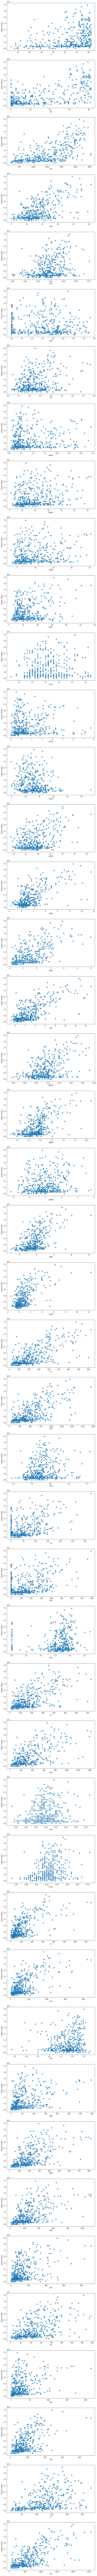

In [35]:
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [36]:
X_train, X_test, y_train, y_test = tts(X,y)

In [37]:
rf_base = RandomForestRegressor()
rf_base.fit(X_train,y_train)
rf_base.score(X_test,y_test)

0.5625874232337778

In [38]:
rf_base_predict = rf_base.predict(X)

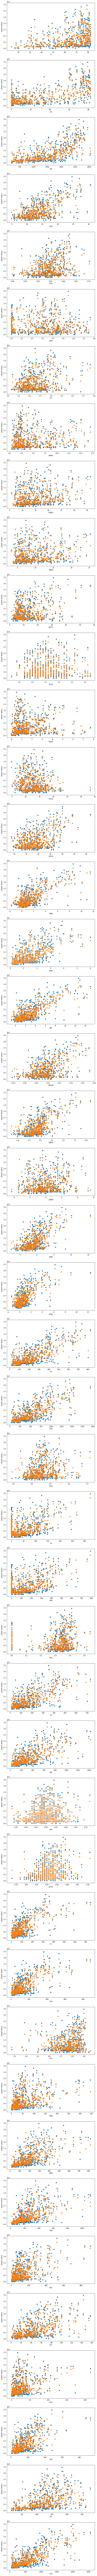

In [39]:
fig, ax = plt.subplots(len(columns),1, figsize=(10,300))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].scatter(X[col], rf_base_predict)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [40]:
final = filtered_df.copy()

In [41]:
final['rf_base_predict'] = rf_base_predict
final['rf_base_predict-actual'] = final['rf_base_predict'] - final[' Player Salary in $ ']

In [42]:
final[['Player Name', ' Player Salary in $ ', 'rf_base_predict', 'rf_base_predict-actual']]

,Player Name,Player Salary in $,rf_base_predict,rf_base_predict-actual
1,Aaron Brooks,2116955.0,2303325.28,186370.28
2,Aaron Gordon,5504420.0,8607060.60,3102640.60
5,Al Horford,27734405.0,11255053.06,-16479351.94
6,Al Jefferson,9769821.0,8539705.40,-1230115.60
8,Alan Williams,6000000.0,5834872.02,-165127.98
...,...,...,...,...
481,Wilson Chandler,12016854.0,10511776.07,-1505077.93
482,Yogi Ferrell,1312611.0,2394472.30,1081861.30
483,Zach LaVine,3202217.0,5105313.07,1903096.07
484,Zach Randolph,12307692.0,10598478.01,-1709213.99


In [43]:
final[final['rf_base_predict-actual']<-10000000][['Player Name', ' Player Salary in $ ', 'rf_base_predict', 'rf_base_predict-actual']]

,Player Name,Player Salary in $,rf_base_predict,rf_base_predict-actual
5,Al Horford,27734405.0,11255053.06,-16479351.94
53,Brandon Knight,13618750.0,3530148.73,-10088601.27
248,Jrue Holiday,25686667.0,10220838.44,-15465828.56
372,Paul Millsap,31269231.0,18050760.93,-13218470.07


In [44]:
final[final['Player Name']=='LeBron James']

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_base_predict,rf_base_predict-actual
293,24365,2017,LeBron James,33285709.0,SF,32,CLE,74,74,2794,27.0,0.619,0.254,0.395,4.0,20.7,12.6,41.3,1.6,1.3,16.1,30.0,9.8,3.0,12.9,0.221,6.8,1.6,8.4,7.3,736,1344,0.548,124,342,0.363,612,1002,0.61,0.59,358,531,0.674,97,543,640,646,92,44,303,134,1954,28876924.83,-4408784.17


In [45]:
final[final['Player Name']=='Stephen Curry']

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_base_predict,rf_base_predict-actual
425,24216,2017,Stephen Curry,34682550.0,PG,28,GSW,79,79,2638,24.6,0.624,0.547,0.251,2.7,11.4,7.3,31.1,2.6,0.5,13.0,30.1,8.6,3.9,12.6,0.229,7.7,-0.4,7.3,6.2,675,1443,0.468,324,789,0.411,351,654,0.54,0.58,325,362,0.898,61,292,353,523,143,17,239,183,1999,31385829.75,-3296720.25


In [48]:
final[(final[' Player Salary in $ ']<5000000) & (final['Pos']=='C')].sort_values('rf_base_predict', ascending=False).head(5)

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_base_predict,rf_base_predict-actual
352,24380,2017,Nikola Jokic,1471382.0,C,21,DEN,73,59,2038,26.4,0.640,0.163,0.267,11.6,27.2,19.5,28.8,1.5,2.1,15.2,23.5,7.7,2.0,9.7,0.229,6.2,2.2,8.3,5.3,494,854,0.578,45,139,0.324000,449,715,0.63,0.61,188,228,0.825,212,506,718,359,61,56,171,214,1221,9026576.67,7555194.67
342,24630,2017,Myles Turner,2569920.0,C,20,IND,81,81,2541,18.5,0.585,0.132,0.349,6.2,19.5,13.0,6.6,1.5,6.0,9.5,19.5,4.3,3.7,8.0,0.151,-0.3,2.7,2.4,2.8,444,869,0.511,40,115,0.348000,404,754,0.54,0.53,245,303,0.809,139,448,587,106,74,173,105,262,1173,8961442.65,6391522.65
124,24219,2017,Deyonta Davis,1312611.0,C,20,MEM,36,0,238,10.6,0.528,0.000,0.383,9.3,19.8,14.4,1.3,0.7,6.8,12.7,12.0,0.1,0.4,0.5,0.097,-5.4,1.8,-3.6,-0.1,24,47,0.511,0,0,0.299342,24,47,0.51,0.51,10,18,0.556,20,40,60,2,3,17,8,40,58,7591222.80,6278611.80
185,24509,2017,Jahlil Okafor,4995120.0,C,21,PHI,50,33,1134,14.8,0.546,0.000,0.335,7.9,15.5,11.7,9.0,0.9,3.4,14.4,24.1,0.1,1.1,1.2,0.050,-3.4,0.1,-3.3,-0.4,242,471,0.514,0,0,0.299342,242,471,0.51,0.51,106,158,0.671,81,159,240,58,20,49,91,122,590,6611170.69,1616050.69
485,24515,2017,Zaza Pachulia,3477600.0,C,32,GSW,70,70,1268,16.1,0.588,0.007,0.410,12.9,22.0,17.7,13.6,2.2,2.0,19.5,15.3,2.2,2.5,4.7,0.177,-0.3,3.0,2.7,1.5,164,307,0.534,0,2,0.000000,164,305,0.54,0.53,98,126,0.778,140,270,410,132,59,33,88,166,426,6438163.54,2960563.54


In [47]:
final[final['Player Name']=='Jeremy Lin']

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_base_predict,rf_base_predict-actual
214,24422,2017,Jeremy Lin,12000000.0,PG,28,BRK,36,33,883,19.2,0.566,0.39,0.353,1.3,14.7,8.1,35.5,2.2,1.2,15.7,26.6,1.3,0.8,2.1,0.115,2.5,-0.5,2.0,0.9,175,400,0.438,58,156,0.372,117,244,0.48,0.51,115,141,0.816,11,124,135,184,41,14,86,79,523,5951444.73,-6048555.27


In [49]:
final.columns

Index(['#', 'Season Start', 'Player Name', ' Player Salary in $ ', 'Pos',
       'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'rf_base_predict', 'rf_base_predict-actual'],
      dtype='object')

In [65]:
drop_columns = ['TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 
       'FG%', '3P%', '2P%', 'eFG%', 'FT%']

In [66]:
dropped_df = filtered_df.copy()
dropped_df = dropped_df.drop(columns=drop_columns)
X, y = get_x_y(dropped_df)

In [67]:
X_train, X_test, y_train, y_test = tts(X,y)

In [68]:
rf_dropped = RandomForestRegressor()
rf_dropped.fit(X_train,y_train)
rf_dropped.score(X_test,y_test)

0.512449960659617

In [69]:
rf_dropped_predict = rf_dropped.predict(X)

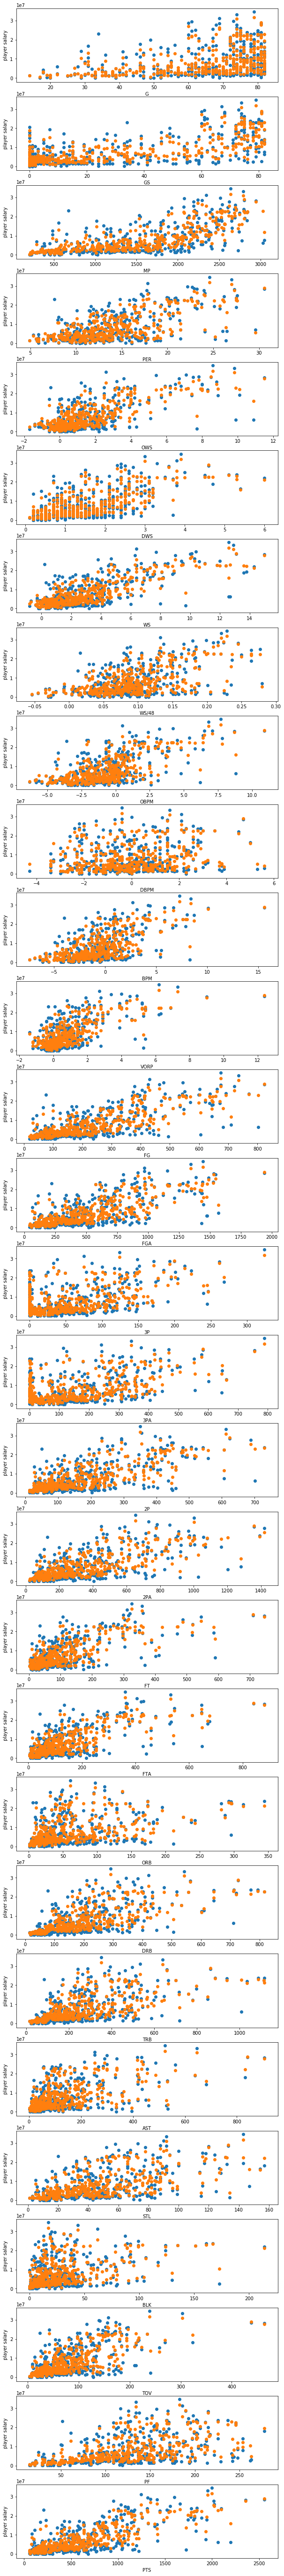

In [70]:
columns = X.columns
fig, ax = plt.subplots(len(columns),1, figsize=(10,100))
for i, col in enumerate(columns):
    ax[i].scatter(X[col], y)
    ax[i].scatter(X[col], rf_dropped_predict)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('player salary')

In [71]:
final_dropped = dropped_df.copy()
final_dropped['rf_dropped_predict'] = rf_dropped_predict
final_dropped['rf_dropped_predict-actual'] = final_dropped['rf_dropped_predict'] - final_dropped[' Player Salary in $ ']

In [72]:
final_dropped

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_dropped_predict,rf_dropped_predict-actual
1,24165,2017,Aaron Brooks,2116955.0,PG,32,IND,65,0,894,9.5,-0.2,0.5,0.3,0.016,-2.1,-2.6,-4.6,-0.6,121,300,48,128,73,172,32,40,18,51,69,125,25,9,66,93,322,2238314.82,121359.82
2,24289,2017,Aaron Gordon,5504420.0,SF,21,ORL,80,72,2298,14.4,2.0,1.7,3.7,0.076,-0.2,-0.4,-0.7,0.8,393,865,77,267,316,598,156,217,116,289,405,150,64,40,89,172,1019,7039894.17,1535474.17
5,24343,2017,Al Horford,27734405.0,C,30,BOS,68,68,2193,17.7,3.6,2.7,6.3,0.137,1.0,2.1,3.1,2.8,379,801,86,242,293,559,108,135,95,369,464,337,52,87,116,138,952,22988156.48,-4746248.52
6,24366,2017,Al Jefferson,9769821.0,C,32,IND,66,1,931,18.9,1.2,1.1,2.3,0.119,-1.5,-1.5,-3.1,-0.3,235,471,0,1,235,470,65,85,75,203,278,57,19,16,33,125,535,7985543.38,-1784277.62
8,24660,2017,Alan Williams,6000000.0,C,24,PHO,47,0,708,19.5,1.1,0.9,2.1,0.142,-1.8,0.2,-1.7,0.1,138,267,0,1,138,266,70,112,94,198,292,23,27,32,37,125,346,5736984.52,-263015.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,24192,2017,Wilson Chandler,12016854.0,SF,29,DEN,71,33,2197,14.9,2.4,1.1,3.6,0.078,0.5,-1.3,-0.8,0.7,433,939,110,326,323,613,141,194,103,356,459,141,52,30,114,172,1117,10901448.76,-1115405.24
482,24259,2017,Yogi Ferrell,1312611.0,PG,23,TOT,46,29,1197,13.1,0.8,1.0,1.8,0.072,-0.1,-0.7,-0.7,0.4,160,394,68,176,92,218,74,89,20,91,111,172,42,9,70,90,462,3736836.92,2424225.92
483,24408,2017,Zach LaVine,3202217.0,SG,21,MIN,47,47,1749,14.6,2.5,0.4,3.0,0.082,2.1,-2.4,-0.3,0.8,326,710,120,310,206,400,117,140,18,141,159,139,41,10,85,104,889,5475380.06,2273163.06
484,24550,2017,Zach Randolph,12307692.0,PF,35,MEM,73,5,1786,18.5,0.8,2.4,3.2,0.086,-1.4,-0.7,-2.1,0.0,433,964,21,94,412,870,141,193,182,416,598,122,38,10,99,136,1028,9232354.79,-3075337.21


In [73]:
final_dropped[final_dropped['Player Name']=='LeBron James']

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_dropped_predict,rf_dropped_predict-actual
293,24365,2017,LeBron James,33285709.0,SF,32,CLE,74,74,2794,27.0,9.8,3.0,12.9,0.221,6.8,1.6,8.4,7.3,736,1344,124,342,612,1002,358,531,97,543,640,646,92,44,303,134,1954,30929877.7,-2355831.3


In [74]:
final_dropped[final_dropped['Player Name']=='Stephen Curry']

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_dropped_predict,rf_dropped_predict-actual
425,24216,2017,Stephen Curry,34682550.0,PG,28,GSW,79,79,2638,24.6,8.6,3.9,12.6,0.229,7.7,-0.4,7.3,6.2,675,1443,324,789,351,654,325,362,61,292,353,523,143,17,239,183,1999,31778456.43,-2904093.57


In [75]:
final_dropped[final_dropped['Player Name']=='James Harden']

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_dropped_predict,rf_dropped_predict-actual
192,24306,2017,James Harden,28299399.0,PG,27,HOU,81,81,2947,27.3,11.5,3.6,15.0,0.245,8.7,1.5,10.1,9.0,674,1533,262,756,412,777,746,881,95,564,659,906,120,37,464,215,2356,27757770.15,-541628.85


In [76]:
final_dropped

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_dropped_predict,rf_dropped_predict-actual
1,24165,2017,Aaron Brooks,2116955.0,PG,32,IND,65,0,894,9.5,-0.2,0.5,0.3,0.016,-2.1,-2.6,-4.6,-0.6,121,300,48,128,73,172,32,40,18,51,69,125,25,9,66,93,322,2238314.82,121359.82
2,24289,2017,Aaron Gordon,5504420.0,SF,21,ORL,80,72,2298,14.4,2.0,1.7,3.7,0.076,-0.2,-0.4,-0.7,0.8,393,865,77,267,316,598,156,217,116,289,405,150,64,40,89,172,1019,7039894.17,1535474.17
5,24343,2017,Al Horford,27734405.0,C,30,BOS,68,68,2193,17.7,3.6,2.7,6.3,0.137,1.0,2.1,3.1,2.8,379,801,86,242,293,559,108,135,95,369,464,337,52,87,116,138,952,22988156.48,-4746248.52
6,24366,2017,Al Jefferson,9769821.0,C,32,IND,66,1,931,18.9,1.2,1.1,2.3,0.119,-1.5,-1.5,-3.1,-0.3,235,471,0,1,235,470,65,85,75,203,278,57,19,16,33,125,535,7985543.38,-1784277.62
8,24660,2017,Alan Williams,6000000.0,C,24,PHO,47,0,708,19.5,1.1,0.9,2.1,0.142,-1.8,0.2,-1.7,0.1,138,267,0,1,138,266,70,112,94,198,292,23,27,32,37,125,346,5736984.52,-263015.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,24192,2017,Wilson Chandler,12016854.0,SF,29,DEN,71,33,2197,14.9,2.4,1.1,3.6,0.078,0.5,-1.3,-0.8,0.7,433,939,110,326,323,613,141,194,103,356,459,141,52,30,114,172,1117,10901448.76,-1115405.24
482,24259,2017,Yogi Ferrell,1312611.0,PG,23,TOT,46,29,1197,13.1,0.8,1.0,1.8,0.072,-0.1,-0.7,-0.7,0.4,160,394,68,176,92,218,74,89,20,91,111,172,42,9,70,90,462,3736836.92,2424225.92
483,24408,2017,Zach LaVine,3202217.0,SG,21,MIN,47,47,1749,14.6,2.5,0.4,3.0,0.082,2.1,-2.4,-0.3,0.8,326,710,120,310,206,400,117,140,18,141,159,139,41,10,85,104,889,5475380.06,2273163.06
484,24550,2017,Zach Randolph,12307692.0,PF,35,MEM,73,5,1786,18.5,0.8,2.4,3.2,0.086,-1.4,-0.7,-2.1,0.0,433,964,21,94,412,870,141,193,182,416,598,122,38,10,99,136,1028,9232354.79,-3075337.21


In [78]:
final_dropped[(final_dropped[' Player Salary in $ ']<5000000) & (final_dropped['Pos']=='C')].sort_values('rf_dropped_predict', ascending=False).head(5)

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_dropped_predict,rf_dropped_predict-actual
342,24630,2017,Myles Turner,2569920.0,C,20,IND,81,81,2541,18.5,4.3,3.7,8.0,0.151,-0.3,2.7,2.4,2.8,444,869,40,115,404,754,245,303,139,448,587,106,74,173,105,262,1173,10534821.02,7964901.02
352,24380,2017,Nikola Jokic,1471382.0,C,21,DEN,73,59,2038,26.4,7.7,2.0,9.7,0.229,6.2,2.2,8.3,5.3,494,854,45,139,449,715,188,228,212,506,718,359,61,56,171,214,1221,8239770.21,6768388.21
78,24182,2017,Clint Capela,2334520.0,C,22,HOU,65,59,1551,21.4,3.9,2.1,6.0,0.185,0.0,1.0,1.0,1.2,362,563,0,0,362,563,94,177,178,348,526,64,34,80,87,179,818,7142675.62,4808155.62
185,24509,2017,Jahlil Okafor,4995120.0,C,21,PHI,50,33,1134,14.8,0.1,1.1,1.2,0.050,-3.4,0.1,-3.3,-0.4,242,471,0,0,242,471,106,158,81,159,240,58,20,49,91,122,590,6281978.03,1286858.03
280,24507,2017,Kyle O'Quinn,4087500.0,C,26,NYK,79,8,1229,20.5,2.1,1.8,3.9,0.151,-0.1,3.7,3.5,1.7,215,413,2,17,213,396,64,83,157,282,439,117,36,104,76,174,496,6069681.45,1982181.45


In [80]:
final_dropped[final_dropped['rf_dropped_predict-actual']<-10000000]

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,rf_dropped_predict,rf_dropped_predict-actual
69,24519,2017,Chandler Parsons,23112004.0,SF,28,MEM,34,34,675,7.6,-0.5,0.7,0.2,0.016,-3.6,-0.5,-4.0,-0.3,75,222,25,93,50,129,35,43,6,78,84,55,20,5,24,52,210,4765222.38,-18346781.62
148,24629,2017,Evan Turner,17131148.0,SF,28,POR,65,12,1658,11.4,0.0,1.2,1.2,0.035,-2.5,-0.1,-2.6,-0.3,235,552,31,118,204,434,85,103,36,211,247,205,53,24,100,121,586,3306164.02,-13824983.98
